In [1]:
!nvidia-smi

Sun Nov  1 09:13:03 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    24W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 載入函數

In [3]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib

os.chdir('/content/drive/Shared drives/類技術班教材/標準版/ 深度學習基礎/DL_part1/Answer')

# 動手試試看

接下來請大家嚐試使用另一種線性不可分的資料集來分類。

In [ ]:
def Spirals_model(rseed=42, n_samples=300):
  theta = np.sqrt(np.random.rand(n_samples))*2*np.pi 

  r_a = 2*theta + np.pi
  data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
  x_a = data_a + np.random.randn(n_samples,2)

  r_b = -2*theta - np.pi
  data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
  x_b = data_b + np.random.randn(n_samples,2)

  res_a = np.append(x_a, np.zeros((n_samples,1)), axis=1)
  res_b = np.append(x_b, np.ones((n_samples,1)), axis=1)

  res = np.append(res_a, res_b, axis=0)
  return res[:,0:2], res[:,2]

### 產生線性不可分資料集

In [ ]:
n_samples = 500
spiral_X, spiral_y = Spirals_model(n_samples=n_samples)

In [ ]:
print('spiral_X: ', spiral_X[:5])
print('spiral_y: ', spiral_y[:5])

spiral_X:  [[ -4.29372783  -9.70042084]
 [  1.76949253 -12.0341923 ]
 [  0.49908183 -12.88982478]
 [  9.51862176 -12.45255029]
 [ -3.19837575   6.36391462]]
spiral_y:  [0. 0. 0. 0. 0.]


### 資料視覺化

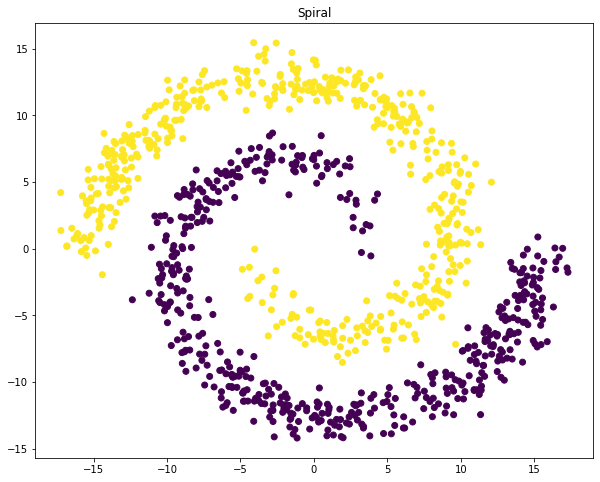

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(spiral_X[:,0], spiral_X[:,1], c = spiral_y)
plt.title('Spiral')
plt.show()

## 切割訓練集 (Training set) 以及測試集 (testing set)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(spiral_X, spiral_y, test_size=0.2, shuffle=True)

print('Training data size: ', X_train.shape)
print('Testing data size: ', X_test.shape)

Training data size:  (800, 2)
Testing data size:  (200, 2)


## 建立模型



In [ ]:
input = tf.keras.layers.Input(shape=(2,), name='Input_layer')
dense1 = tf.keras.layers.Dense(8, activation='relu', use_bias=True, name='dense1')
dense2 = tf.keras.layers.Dense(4, activation='relu', use_bias=True, name='dense2')
dense3 = tf.keras.layers.Dense(1, activation='sigmoid', use_bias=True, name='dense3')

dense1_output = dense1(input)
dense2_output = dense2(dense1_output)
output = dense3(dense2_output)

model = tf.keras.Model(input, output, name='linear_nonseparability')

model.summary()

Model: "linear_nonseparability"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     [(None, 2)]               0         
_________________________________________________________________
dense1 (Dense)               (None, 8)                 24        
_________________________________________________________________
dense2 (Dense)               (None, 4)                 36        
_________________________________________________________________
dense3 (Dense)               (None, 1)                 5         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


## 訓練模型


In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
# 訓練模型
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32)

Epoch 1/200
25/25 [==============================] - 0s 16ms/step - loss: 0.9807 - accuracy: 0.6087 - val_loss: 0.5797 - val_accuracy: 0.6700
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5539 - accuracy: 0.6925 - val_loss: 0.5473 - val_accuracy: 0.7350
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5251 - accuracy: 0.7412 - val_loss: 0.4947 - val_accuracy: 0.7800
Epoch 4/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5087 - accuracy: 0.7400 - val_loss: 0.4816 - val_accuracy: 0.7700
Epoch 5/200
25/25 [==============================] - 0s 4ms/step - loss: 0.4944 - accuracy: 0.7375 - val_loss: 0.4690 - val_accuracy: 0.7700
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 0.4880 - accuracy: 0.7325 - val_loss: 0.4657 - val_accuracy: 0.7650
Epoch 7/200
25/25 [==============================] - 0s 4ms/step - loss: 0.4843 - accuracy: 0.7312 - val_loss: 0.4567 - val_accuracy: 0.7750
Epoch 8/200


## 評估模型


In [ ]:
y_pred = model.predict(X_test)
y_pred_class = np.where(y_pred >= 0.5, 1, 0)

# 模型預測，每個數值表示每筆資料的預測概率，通常用 0.5 當成閥值，小於 0.5 屬於第一類；大於 0.5 屬於第二類
print('Model predicted probabilities: ', y_pred[:5])
print('Model predicted classes: ', y_pred_class[:5])

Model predicted probabilities:  [[8.7268865e-01]
 [2.7957723e-08]
 [9.6390545e-01]
 [1.0000000e+00]
 [7.2629382e-06]]
Model predicted classes:  [[1]
 [0]
 [1]
 [1]
 [0]]


### 混淆矩陣

In [ ]:
cnfm = confusion_matrix(y_pred=y_pred_class, y_true=y_test)
cnfm = pd.DataFrame(cnfm, columns=['Pred_0', 'Pred_1'], index=['Actual_0', 'Actual_1'])
cnfm

,Pred_0,Pred_1
Actual_0,91,1
Actual_1,0,108


### Precision, Recall

In [ ]:
report =  classification_report(y_pred=y_pred_class, y_true=y_test)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        92
         1.0       0.99      1.00      1.00       108

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



## Prediction boundary

接下來我們來觀察模型的預測邊界，透過這個方式，可以了解模型在判斷資料時的依據，到底在哪個地方判斷每個類別。

In [ ]:
# 產生網格資料
x1=np.linspace(-20,20,100)
x2=np.linspace(-20,20,100)

x1, x2 = np.meshgrid(x1, x2)
plot_data = np.array(list(zip(x1.flatten(), x2.flatten())))

print('Plot data shape: ', plot_data.shape)

Plot data shape:  (10000, 2)


In [ ]:
# 將網格上每個點都進行預測

plot_y = model.predict(plot_data)
plot_y_class = np.where(plot_y >= 0.5, 1, 0)
plot_y_class = [t[0] for t in plot_y_class]

### Plot boundary

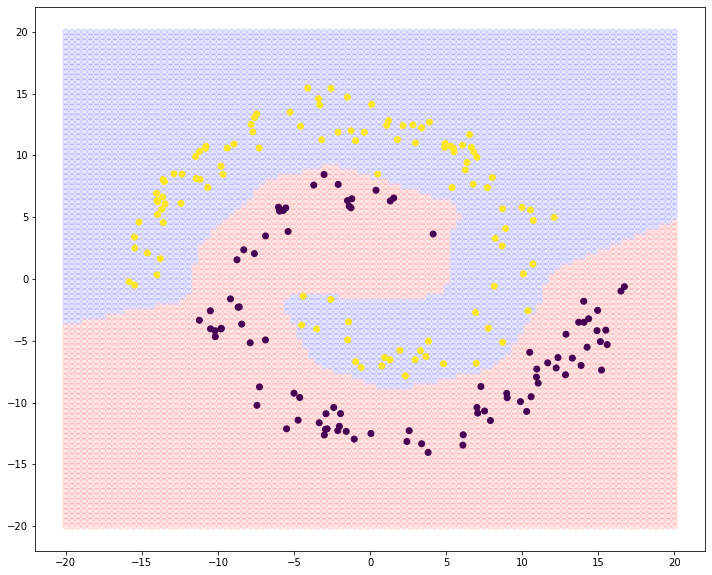

In [ ]:
plt.figure(figsize=(12,10))
colors = ['red', 'blue']
# 第一個 scatter 畫出網格點, 顏色分別為紅色和藍色
plt.scatter(x1, x2, c = plot_y_class, alpha=0.1, cmap=matplotlib.colors.ListedColormap(colors))

# 第二個 scatter 畫出測試集 X_test 的預測類別
plt.scatter(X_test[:,0], X_test[:,1], c = [t[0] for t in y_pred_class])
plt.show()